In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from models import MLP
from datasets import load_from_folder, one_hot_encode
from metric import accuracy
from optimizers import SGD
from losses import CategoricalCrossEntropy
np.random.seed(69)

In [2]:
path = './flowers/'
width = 320
height = 240

In [3]:
(train_data, train_label), (test_data, test_label) = load_from_folder(path, test_split=0.2, target_size=(width, height))

train_data = train_data.reshape(-1, height*width)
test_data = test_data.reshape(-1, height*width)

# test_label = one_hot_encode(test_label)
# train_label = one_hot_encode(train_label)

In [4]:
model = MLP(width*height, 3)
loss = CategoricalCrossEntropy()
learning_rate = 0.1
opt = SGD(lr=learning_rate)
model.compile(opt, loss)

In [5]:
history = model.train(train_data, train_label, return_logs=True, epochs=50)

epoch 1/50: loss: 2.8382327599851465; acc: 0.3333333333333333
epoch 2/50: loss: 0.22762060601705178; acc: 0.3333333333333333
epoch 3/50: loss: 0.2261700640872992; acc: 0.3333333333333333
epoch 4/50: loss: 0.22473603230186137; acc: 0.3333333333333333
epoch 5/50: loss: 0.22331825306391562; acc: 0.3333333333333333
epoch 6/50: loss: 0.22191647369165307; acc: 0.3333333333333333
epoch 7/50: loss: 0.22053044631166804; acc: 0.3333333333333333
epoch 8/50: loss: 0.2191599277548102; acc: 0.3333333333333333
epoch 9/50: loss: 0.21780467945444268; acc: 0.3333333333333333
epoch 10/50: loss: 0.21646446734705307; acc: 0.3333333333333333
epoch 11/50: loss: 0.21513906177516207; acc: 0.3333333333333333
epoch 12/50: loss: 0.2138282373924813; acc: 0.3333333333333333
epoch 13/50: loss: 0.21253177307126425; acc: 0.3333333333333333
epoch 14/50: loss: 0.21124945181180235; acc: 0.3333333333333333
epoch 15/50: loss: 0.20998106065401764; acc: 0.3333333333333333
epoch 16/50: loss: 0.20872639059110068; acc: 0.333333

[]

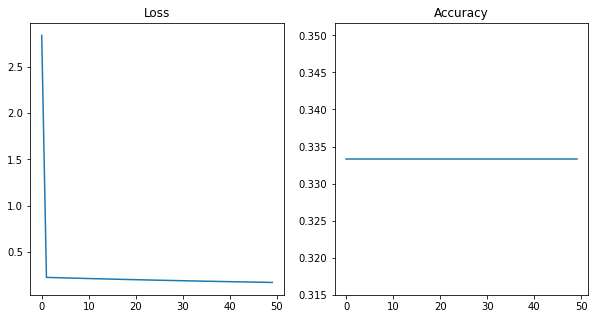

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(history['loss'], label='loss')
ax1.set_title("Loss")
ax2.plot(history['acc'], label='acc')
ax2.set_title("Accuracy")
plt.plot()

In [7]:
preds = model.predict(test_data)
print("test accuracy = {}".format(accuracy(test_label, preds)))

test accuracy = 0.3333333333333333
